# Average Case

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdateavg2.csv")
#should end on Mar 25th 2016
df_96on = data[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports']][0:1056]
df_96on.tail(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
1054,3/18/2016,95.086,41.14,371.75,1.989,52.20,52.20,265,265,1000000
1055,3/25/2016,96.273,40.63,374.50,1.882,51.75,51.75,255,255,1000000


In [143]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
Coal_RDF(MLR)             float64
Coal_RDF(RDF)             float64
Urea_RDF(MLR)             float64
Urea_RDF(RDF)             float64
Monthly Imports           float64
dtype: object

In [146]:
df_96on.describe() #make sure coal same and urea same

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,90.653367,54.851648,361.660275,4.611925,58.312026,58.312026,260.121212,260.121212,433007.549242
std,11.734927,31.319022,157.085607,2.364021,33.658418,33.658418,135.997458,135.997458,217395.350089
min,71.657000,11.260000,182.500000,1.661000,20.900000,20.900000,83.000000,83.000000,76875.000000
25%,81.117750,26.402500,231.000000,2.770750,27.425593,27.425593,150.750000,150.750000,273276.000000
50%,87.835000,49.655000,322.750000,4.033500,51.925000,51.925000,240.000000,240.000000,397255.000000
75%,98.747500,82.082500,425.562500,5.879250,80.175000,80.175000,335.000000,335.000000,561875.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,192.500000,825.000000,825.000000,1196863.000000


In [147]:
df_96on.corr()

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
Dollar,1.000000,-0.774917,-0.682258,-0.329794,-0.755278,-0.755278,-0.728513,-0.728513,-0.273806
Crude,-0.774917,1.000000,0.777945,0.392775,0.894912,0.894912,0.870592,0.870592,0.404582
Corn,-0.682258,0.777945,1.000000,-0.000857,0.835674,0.835674,0.800001,0.800001,0.336304
Gas,-0.329794,0.392775,-0.000857,1.000000,0.285057,0.285057,0.325148,0.325148,0.186481
Coal_RDF(MLR),-0.755278,0.894912,0.835674,0.285057,1.000000,1.000000,0.882479,0.882479,0.347260
Coal_RDF(RDF),-0.755278,0.894912,0.835674,0.285057,1.000000,1.000000,0.882479,0.882479,0.347260
Urea_RDF(MLR),-0.728513,0.870592,0.800001,0.325148,0.882479,0.882479,1.000000,1.000000,0.421153
Urea_RDF(RDF),-0.728513,0.870592,0.800001,0.325148,0.882479,0.882479,1.000000,1.000000,0.421153
Monthly Imports,-0.273806,0.404582,0.336304,0.186481,0.347260,0.347260,0.421153,0.421153,1.000000


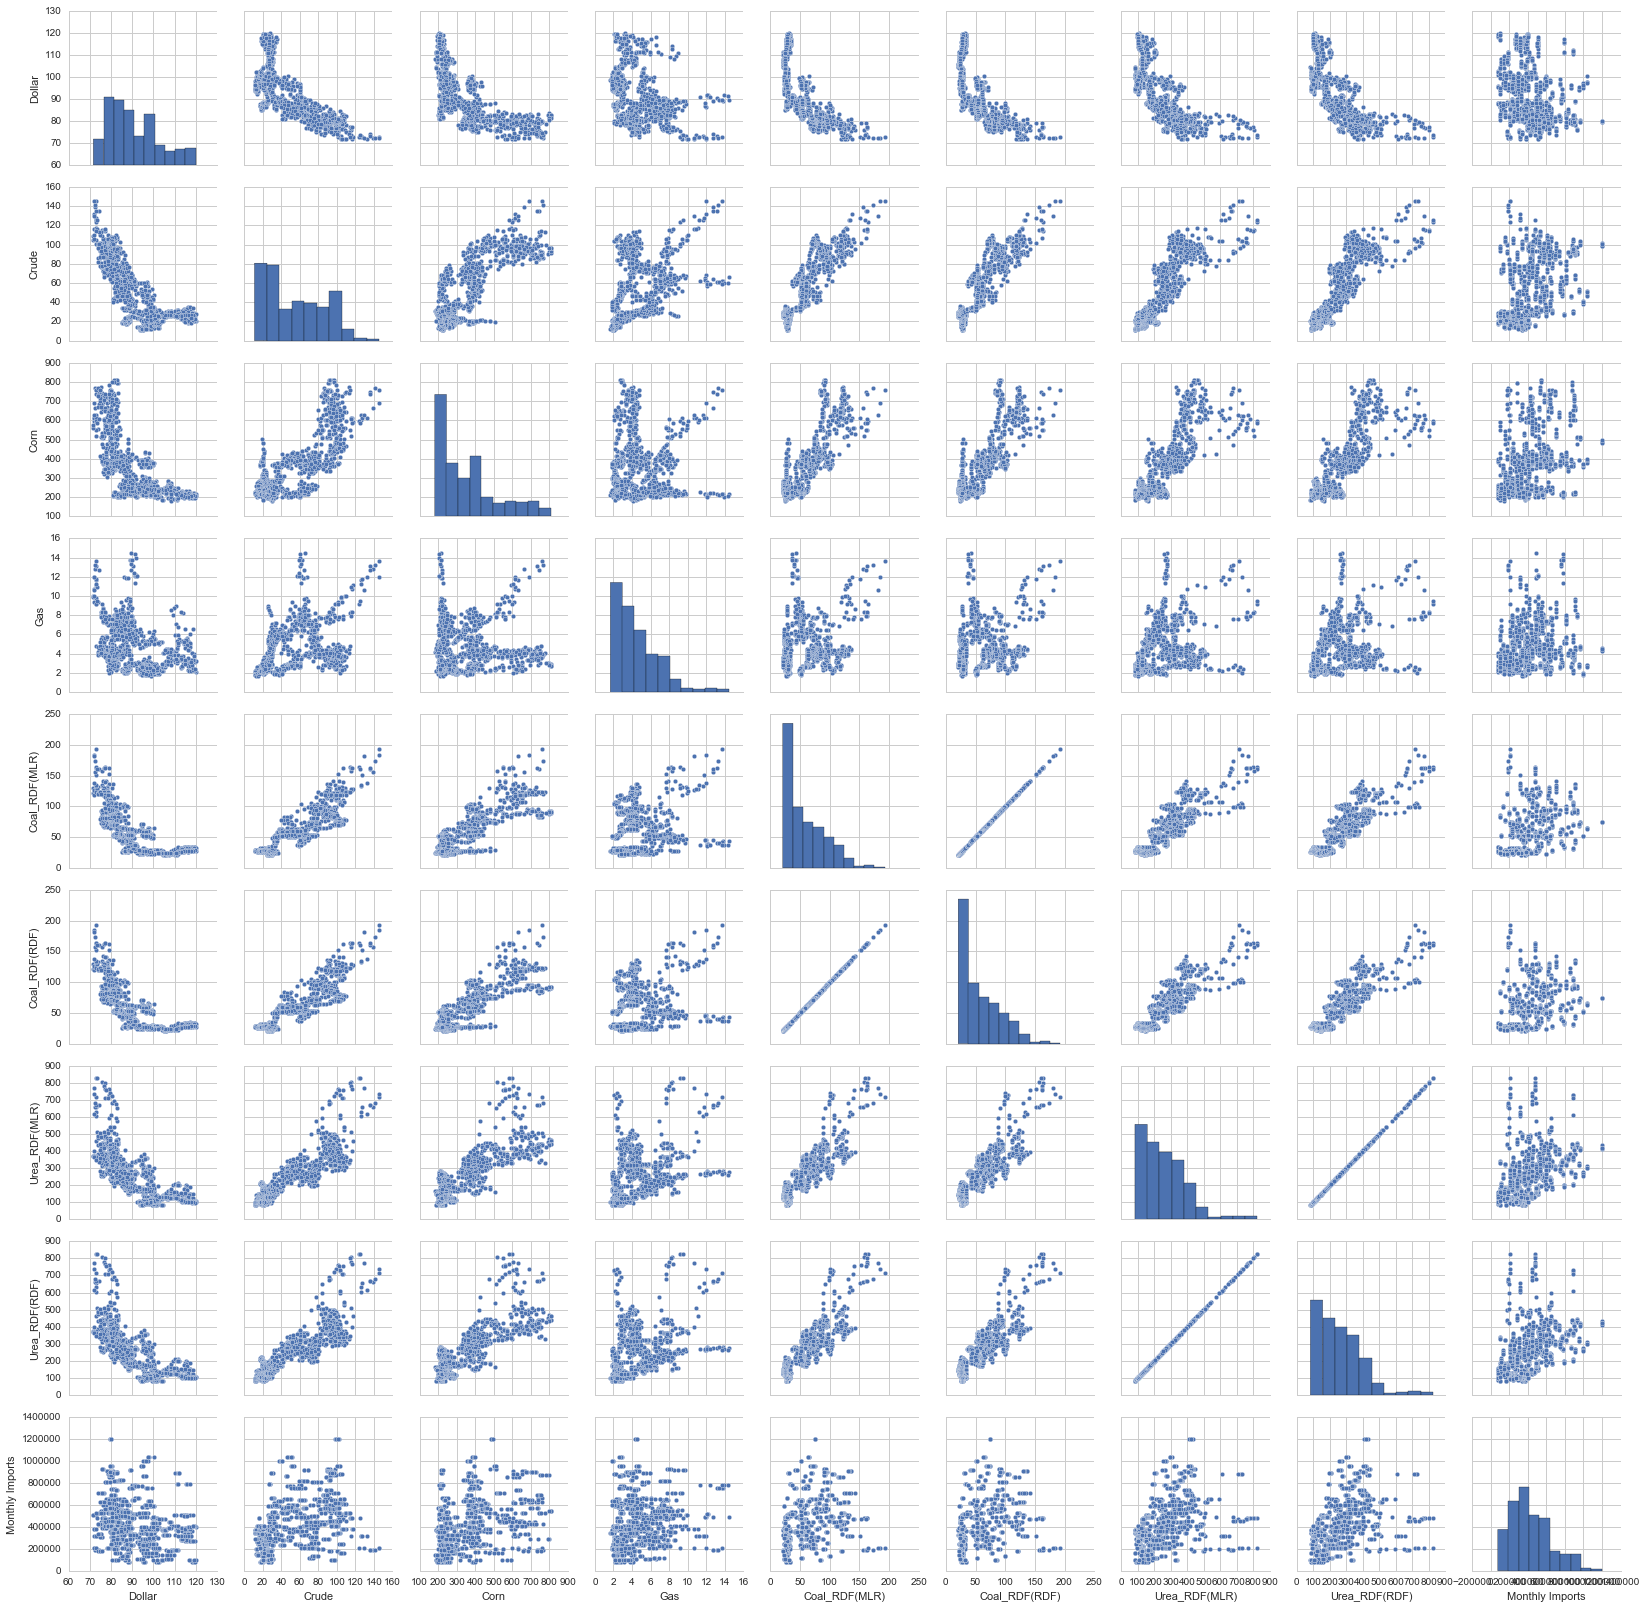

In [155]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()

In [105]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']]
Y = df_96on[['Monthly Imports']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#so forget about MLR models for modeling imports, so I will just use RDF's

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Monthly Imports   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     44.81
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           6.14e-49
Time:                        08:37:52   Log-Likelihood:                -14355.
No. Observations:                1056   AIC:                         2.872e+04
Df Residuals:                    1049   BIC:                         2.876e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -4.513e+04   9.66e+04     -0.467      0.640     -2.35e+05  1.44e+05
Dollar         2457.8512    844.106      2.912      0.004       801.523  4114.179
Crude          2223.7798    509.134      4.368      0.000      1224.743  3222.817
Corn            155.7680     86.728      1.796      0.073       -14.413   325.949
Gas            5712.5101   3381.638      1.689      0.091      -923.035  1.23e+04
Coal_RDF(MLR) -1884.2048    493.093     -3.821      0.000     -2851.766  -916.644
Urea_RDF(MLR)   617.1834    105.764      5.835      0.000       409.651   824.716
==============================================================================
Omnibus:                       33.317   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.231
Skew:                           0.385   Prob(JB):                     4.99e-09
Kurtosis:                       3.526   Cond. No.                     8.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
#first look at coal mlr and urea mlr ones
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 3009843327.894, test: 11362452589.065
R^2 train: 0.938, test: 0.742
[ 0.15912449  0.12507074  0.07910569  0.12543977  0.1257149   0.38554442]


In [157]:
#comparing different models so just one model so far but will then add rdf with coal rdf and urea rdf
import_predicted3 = forest.predict(X)
import_predicted3 = pd.DataFrame(import_predicted3)
df_96on['Import_Pred_RDF(MLR)'] = import_predicted3
rdf_error3 = (abs(df_96on['Import_Pred_RDF(MLR)'] - df_96on['Monthly Imports'])/df_96on['Monthly Imports'])*100
df_96on['RDF_Error(MLR)'] = rdf_error3

import_predicted4 = forest.predict(X)
import_predicted4 = pd.DataFrame(import_predicted4)
df_96on['Import_Pred_RDF(RDF)'] = import_predicted4
rdf_error4 = (abs(df_96on['Import_Pred_RDF(RDF)'] - df_96on['Monthly Imports'])/df_96on['Monthly Imports'])*100
df_96on['RDF_Error(RDF)'] = rdf_error4

#make sure errors are the same considering same rdf
print("Average Monthly Imports RDF(MLR) error is: %.3f" % (rdf_error3.mean()))
print("Average Monthly Imports RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
df_96on

Average Monthly Imports RDF(MLR) error is: 15.840
Average Monthly Imports RDF(RDF) error is: 15.840


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),RDF_Error(MLR),Import_Pred_RDF(RDF),RDF_Error(RDF)
0,1/5/1996,85.060,19.65,369.75,2.424,25.358912,25.358912,220,220,408740,379036.201855,7.267162,379036.201855,7.267162
1,1/12/1996,85.060,17.98,366.25,2.215,25.269689,25.269689,220,220,408740,382101.214955,6.517293,382101.214955,6.517293
2,1/19/1996,86.750,18.25,365.00,1.956,29.070713,29.070713,218,218,408740,322456.891718,21.109534,322456.891718,21.109534
3,1/26/1996,87.640,17.36,360.25,1.952,29.195096,29.195096,215,215,408740,295801.143079,27.630977,295801.143079,27.630977
4,2/2/1996,87.010,17.38,370.50,2.075,32.105527,32.105527,205,205,276750,278391.386259,0.593093,278391.386259,0.593093
5,2/9/1996,86.870,17.38,367.25,2.244,28.667889,28.667889,205,205,276750,283663.623340,2.498148,283663.623340,2.498148
6,2/16/1996,85.910,18.40,382.75,2.171,28.169393,28.169393,210,210,276750,277461.747637,0.257181,277461.747637,0.257181
7,2/23/1996,85.430,18.45,383.50,2.263,28.828182,28.828182,210,210,276750,284150.307868,2.674005,284150.307868,2.674005
8,3/1/1996,86.490,18.62,386.75,2.058,27.863549,27.863549,210,210,268773,274398.596489,2.093066,274398.596489,2.093066
9,3/8/1996,86.810,18.87,388.50,2.053,26.513218,26.513218,205,205,268773,269480.227965,0.263132,269480.227965,0.263132


In [158]:
newpred2 = data [['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)']][1056:]
newpred = data [['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']][1056:]
newpred3 = data[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)','Urea_RDF(RDF)']][1056:]

In [159]:
#new predictions starting with mlr verison
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Import_Pred_RDF(MLR)'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 2919670114.510, test: 11107830413.926
R^2 train: 0.940, test: 0.747
[ 0.15386168  0.12145995  0.08019084  0.12061654  0.13074023  0.39313078]


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Import_Pred_RDF(MLR)
0,2016-03-26,96.273,40.63,374.5,1.882,52.141,52.2996,257.104,255.584,834565.513000
1,2016-03-27,96.273,40.63,374.5,1.882,52.141,52.2996,257.104,255.584,834565.513000
2,2016-03-28,95.943,40.53,370.5,1.936,52.141,53.059,257.65,246.38,819484.342617
3,2016-03-29,95.16,39.51,373,1.981,53.0023,53.5602,236.912,235.608,732100.296260
4,2016-03-30,94.841,39.66,367,2.11,53.1493,53.7676,241.425,241.961,636485.523572
5,2016-03-31,94.586,39.36,351.5,2.054,53.1866,57.4817,243.873,255.647,667146.008152
6,2016-04-01,96.2914,39.55,372.991,2.05454,52.141,52.2996,242.751,243.048,699925.116914
7,2016-04-02,96.3182,39.52,372.974,2.05509,52.1103,52.2996,242.81,242.733,697723.226524
8,2016-04-03,96.345,39.49,372.957,2.05563,52.1103,52.2996,242.175,241.212,693702.980810
9,2016-04-04,96.3717,39.46,372.94,2.05618,52.1103,52.2996,242.175,241.212,693702.980810


In [160]:
#now rdf coal and urea this time
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)','Urea_RDF(RDF)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Import_Pred_RDF(RDF)'] = df_new_pred2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 3095172576.291, test: 11175186785.047
R^2 train: 0.936, test: 0.746
[ 0.15012229  0.13137416  0.08516996  0.11697724  0.13807547  0.37828088]


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
0,2016-03-26,96.273,40.63,374.5,1.882,52.141,52.2996,257.104,255.584,834565.513000,862447.209277
1,2016-03-27,96.273,40.63,374.5,1.882,52.141,52.2996,257.104,255.584,834565.513000,862447.209277
2,2016-03-28,95.943,40.53,370.5,1.936,52.141,53.059,257.65,246.38,819484.342617,748392.777991
3,2016-03-29,95.16,39.51,373,1.981,53.0023,53.5602,236.912,235.608,732100.296260,752623.674327
4,2016-03-30,94.841,39.66,367,2.11,53.1493,53.7676,241.425,241.961,636485.523572,632880.169670
5,2016-03-31,94.586,39.36,351.5,2.054,53.1866,57.4817,243.873,255.647,667146.008152,777760.731654
6,2016-04-01,96.2914,39.55,372.991,2.05454,52.141,52.2996,242.751,243.048,699925.116914,712620.105345
7,2016-04-02,96.3182,39.52,372.974,2.05509,52.1103,52.2996,242.81,242.733,697723.226524,712620.105345
8,2016-04-03,96.345,39.49,372.957,2.05563,52.1103,52.2996,242.175,241.212,693702.980810,706826.836774
9,2016-04-04,96.3717,39.46,372.94,2.05618,52.1103,52.2996,242.175,241.212,693702.980810,706826.836774


In [161]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Coal_RDF(MLR),Coal_RDF(RDF),Corn,Crude,Date,Dollar,Gas,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF),Monthly Imports,RDF_Error(MLR),RDF_Error(RDF),Urea_RDF(MLR),Urea_RDF(RDF)
0,25.3589,25.3589,369.75,19.65,1/5/1996,85.06,2.424,379036.201855,379036.201855,408740,7.267162,7.267162,220,220
1,25.2697,25.2697,366.25,17.98,1/12/1996,85.06,2.215,382101.214955,382101.214955,408740,6.517293,6.517293,220,220
2,29.0707,29.0707,365,18.25,1/19/1996,86.75,1.956,322456.891718,322456.891718,408740,21.109534,21.109534,218,218
3,29.1951,29.1951,360.25,17.36,1/26/1996,87.64,1.952,295801.143079,295801.143079,408740,27.630977,27.630977,215,215
4,32.1055,32.1055,370.5,17.38,2/2/1996,87.01,2.075,278391.386259,278391.386259,276750,0.593093,0.593093,205,205
5,28.6679,28.6679,367.25,17.38,2/9/1996,86.87,2.244,283663.623340,283663.623340,276750,2.498148,2.498148,205,205
6,28.1694,28.1694,382.75,18.4,2/16/1996,85.91,2.171,277461.747637,277461.747637,276750,0.257181,0.257181,210,210
7,28.8282,28.8282,383.5,18.45,2/23/1996,85.43,2.263,284150.307868,284150.307868,276750,2.674005,2.674005,210,210
8,27.8635,27.8635,386.75,18.62,3/1/1996,86.49,2.058,274398.596489,274398.596489,268773,2.093066,2.093066,210,210
9,26.5132,26.5132,388.5,18.87,3/8/1996,86.81,2.053,269480.227965,269480.227965,268773,0.263132,0.263132,205,205


In [115]:
combined.to_csv("C:/Users/msteinme/Documents/monthlyimportsavgmarch2.csv")

In [162]:
#want to go 0,1,2 and no chunk that starts out at 0 again
combined = combined[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
combined.tail(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
2796,2020-12-30 00:00:00,86.9025,62.2438,445.969,2.99946,61.8392,60.5433,303.7,324.014,NaN,504206,510074
2797,2020-12-31 00:00:00,86.9,62.25,446,3,61.8392,60.5433,303.7,324.014,NaN,504206,510074


In [163]:
cols = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]

feb_07

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
578,2/2/2007,84.96,59.73,414.75,7.521,52,52,322,322,647111,579412,579412
579,2/9/2007,84.88,60.63,418,7.837,52.65,52.65,325,325,647111,546864,546864
580,2/16/2007,84.06,59.86,429.5,7.533,52.65,52.65,330,330,647111,589264,589264
581,2/23/2007,84.05,62.35,442.5,7.806,52.65,52.65,345,345,647111,655200,655200


In [118]:
apr_16 = combined[cols][1062:1092]
may_16 = combined[cols][1092:1123]
jun_16 = combined[cols][1123:1153]
jul_16 = combined[cols][1153:1184]
aug_16 = combined[cols][1184:1215]
sep_16 = combined[cols][1215:1245]
oct_16 = combined[cols][1245:1276]
nov_16 = combined[cols][1276:1306]
dec_16 = combined[cols][1306:1337]
jan_17 = combined[cols][1337:1368]
feb_17 = combined[cols][1368:1396]
mar_17 = combined[cols][1396:1427]
apr_17 = combined[cols][1427:1457]
may_17 = combined[cols][1457:1488]
jun_17 = combined[cols][1488:1518]
jul_17 = combined[cols][1518:1549]
aug_17 = combined[cols][1549:1580]
sep_17 = combined[cols][1580:1610]
oct_17 = combined[cols][1610:1641]
nov_17 = combined[cols][1641:1671]
dec_17 = combined[cols][1671:1702]
jan_18 = combined[cols][1702:1733]
feb_18 = combined[cols][1733:1761]
mar_18 = combined[cols][1761:1792]
apr_18 = combined[cols][1792:1822]
may_18 = combined[cols][1822:1853]
jun_18 = combined[cols][1853:1883]
jul_18 = combined[cols][1883:1914]
aug_18 = combined[cols][1914:1945]
sep_18 = combined[cols][1945:1975]
oct_18 = combined[cols][1975:2006]
nov_18 = combined[cols][2006:2036]
dec_18 = combined[cols][2036:2067]
jan_19 = combined[cols][2067:2098]
feb_19 = combined[cols][2098:2126]
mar_19 = combined[cols][2126:2157]
apr_19 = combined[cols][2157:2187]
may_19 = combined[cols][2187:2218]
jun_19 = combined[cols][2218:2248]
jul_19 = combined[cols][2248:2279]
aug_19 = combined[cols][2279:2310]
sep_19 = combined[cols][2310:2340]
oct_19 = combined[cols][2340:2371]
nov_19 = combined[cols][2371:2401]
dec_19 = combined[cols][2401:2432]
jan_20 = combined[cols][2432:2463]
feb_20 = combined[cols][2463:2492]
mar_20 = combined[cols][2492:2523]
apr_20 = combined[cols][2523:2553]
may_20 = combined[cols][2553:2584]
jun_20 = combined[cols][2584:2614]
jul_20 = combined[cols][2614:2645]
aug_20 = combined[cols][2645:2676]
sep_20 = combined[cols][2676:2706]
oct_20 = combined[cols][2706:2737]
nov_20 = combined[cols][2737:2767]
dec_20 = combined[cols][2767:2798]
sep_18

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
1945,2018-09-01 00:00:00,93.0283,56.6005,405.154,2.53572,60.771,59.0962,322.716,313.111,NaN,694550,695684
1946,2018-09-02 00:00:00,93.0132,56.622,405.205,2.53626,60.8792,59.0962,322.782,313.111,NaN,698024,695684
1947,2018-09-03 00:00:00,92.9981,56.6435,405.256,2.53681,60.8792,59.1356,322.782,313.111,NaN,698024,695684
1948,2018-09-04 00:00:00,92.983,56.6649,405.307,2.53735,60.8792,59.1356,322.782,313.111,NaN,698024,695684
1949,2018-09-05 00:00:00,92.9679,56.6864,405.358,2.5379,60.8792,59.1356,322.782,313.111,NaN,698024,695684
1950,2018-09-06 00:00:00,92.9527,56.7079,405.409,2.53844,60.8792,59.127,322.782,313.111,NaN,698024,695684
1951,2018-09-07 00:00:00,92.9376,56.7294,405.46,2.53899,60.8792,59.127,322.782,313.111,NaN,698024,696717
1952,2018-09-08 00:00:00,92.9225,56.7509,405.511,2.53953,60.8941,59.127,323.162,313.981,NaN,698024,697707
1953,2018-09-09 00:00:00,92.9074,56.7724,405.562,2.54008,60.8642,59.127,323.279,313.981,NaN,698024,697707
1954,2018-09-10 00:00:00,92.8923,56.7938,405.613,2.54062,60.8642,59.127,323.171,313.981,NaN,698024,697707


In [164]:
mycolumns = ['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()    

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
295,87.237808,61.405479,441.747370,2.925344,61.322860,62.092362,313.099387,286.386676,NaN,502542.688060,428225.911403
296,87.162603,61.593493,442.694123,2.941965,62.435777,63.095283,294.204146,272.610335,NaN,438928.075014,398941.416499
297,87.087397,61.781507,443.640877,2.958585,67.616060,67.383944,271.986822,272.061108,NaN,386103.816483,400803.546036
298,87.012192,61.969521,444.587630,2.975206,67.714243,67.110128,272.161095,271.724943,NaN,387580.567011,404239.238318
299,86.936986,62.157534,445.534384,2.991826,62.985577,62.446154,288.069469,298.100215,NaN,422125.301382,463807.873345


In [165]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [166]:
print(df.dtypes)
df

Dollar                         float64
Crude                          float64
Corn                           float64
Gas                            float64
Coal_RDF(MLR)                  float64
Coal_RDF(RDF)                  float64
Urea_RDF(MLR)                  float64
Urea_RDF(RDF)                  float64
Monthly Imports                float64
Import_Pred_RDF(MLR)           float64
Import_Pred_RDF(RDF)           float64
Monthly_Date            datetime64[ns]
dtype: object


,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF),Monthly_Date
0,86.127500,18.310000,365.312500,2.136750,27.223602,27.223602,218.250000,218.250000,408740,344848.862902,344848.862902,1996-01-31
1,86.305000,17.902500,376.000000,2.188250,29.442748,29.442748,207.500000,207.500000,276750,280916.766276,280916.766276,1996-02-29
2,86.514000,19.604000,385.750000,2.200200,27.647682,27.647682,204.000000,204.000000,268773,267488.749630,267488.749630,1996-03-31
3,87.380000,21.172500,443.625000,2.315000,29.242930,29.242930,193.750000,193.750000,236157,239249.176037,239249.176037,1996-04-30
4,88.124000,19.824000,450.550000,2.313000,28.227713,28.227713,166.200000,166.200000,174170,158318.337952,158318.337952,1996-05-31
5,88.170000,19.587500,390.750000,2.639000,26.705908,26.705908,152.500000,152.500000,76875,101360.611686,101360.611686,1996-06-30
6,87.282500,20.512500,378.875000,2.516500,26.939806,26.939806,172.500000,172.500000,98461,118485.035029,118485.035029,1996-07-31
7,86.364000,21.400000,336.000000,2.144600,26.965043,26.965043,185.000000,185.000000,136033,137294.020318,137294.020318,1996-08-31
8,87.487500,23.572500,321.500000,2.165250,26.467497,26.467497,180.000000,180.000000,154181,156218.599018,156218.599018,1996-09-30
9,88.020000,24.585000,287.812500,2.592000,26.756809,26.756809,178.500000,178.500000,194120,198161.445287,198161.445287,1996-10-31


In [122]:
#std dev of each of the different models
RDFMLR_upper = df['Import_Pred_RDF(MLR)'] + combined['Import_Pred_RDF(MLR)'].std()
df['RDF(MLR)Upper'] = RDFMLR_upper
RDFMLR_lower = df['Import_Pred_RDF(MLR)'] - combined['Import_Pred_RDF(MLR)'].std()
df['RDF(MLR)Lower'] = RDFMLR_lower

RDFRDF_upper = df['Import_Pred_RDF(RDF)'] + combined['Import_Pred_RDF(RDF)'].std()
df['RDF(RDF)Upper'] = RDFRDF_upper
RDFRDF_lower = df['Import_Pred_RDF(RDF)'] - combined['Import_Pred_RDF(RDF)'].std()
df['RDF(RDF)Lower'] = RDFRDF_lower

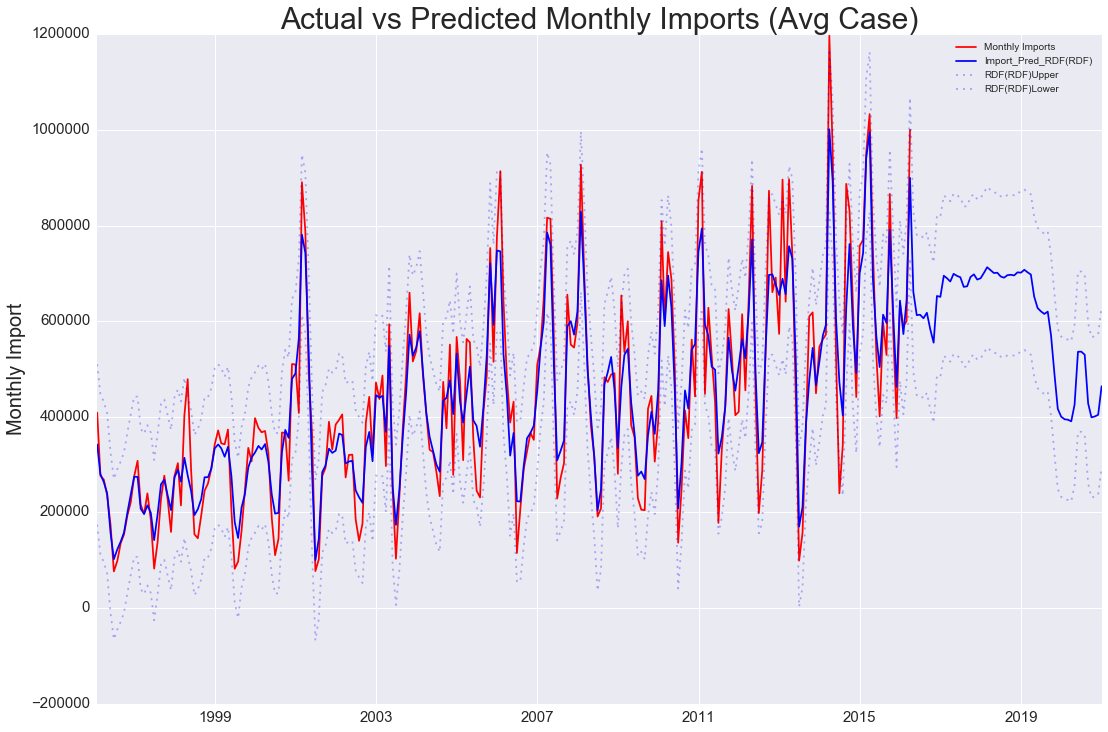

In [127]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'][243:])
y1 = (df['Monthly Imports'])
y4 = (df['Import_Pred_RDF(MLR)'][243:])
y5 = (df['Import_Pred_RDF(RDF)'])
y10 = (df['RDF(MLR)Upper'][243:])
y11 = (df['RDF(MLR)Lower'][243:])
y12 = (df['RDF(RDF)Upper'])
y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x_pred,y4,'g')
ax.plot(x,y5,'b')

#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Imports (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Monthly Import',size=(20))

plt.show()

In [128]:
#now daily so not as smooth, but first find new std dev of all predicted models
#std dev of each of the different models
RDFMLR_upper2 = combined['Import_Pred_RDF(MLR)'] + combined['Import_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Upper'] = RDFMLR_upper2
RDFMLR_lower2 = combined['Import_Pred_RDF(MLR)'] - combined['Import_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Lower'] = RDFMLR_lower2

RDFRDF_upper2 = combined['Import_Pred_RDF(RDF)'] + combined['Import_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Upper'] = RDFRDF_upper2
RDFRDF_lower2 = combined['Import_Pred_RDF(RDF)'] - combined['Import_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Lower'] = RDFRDF_lower2

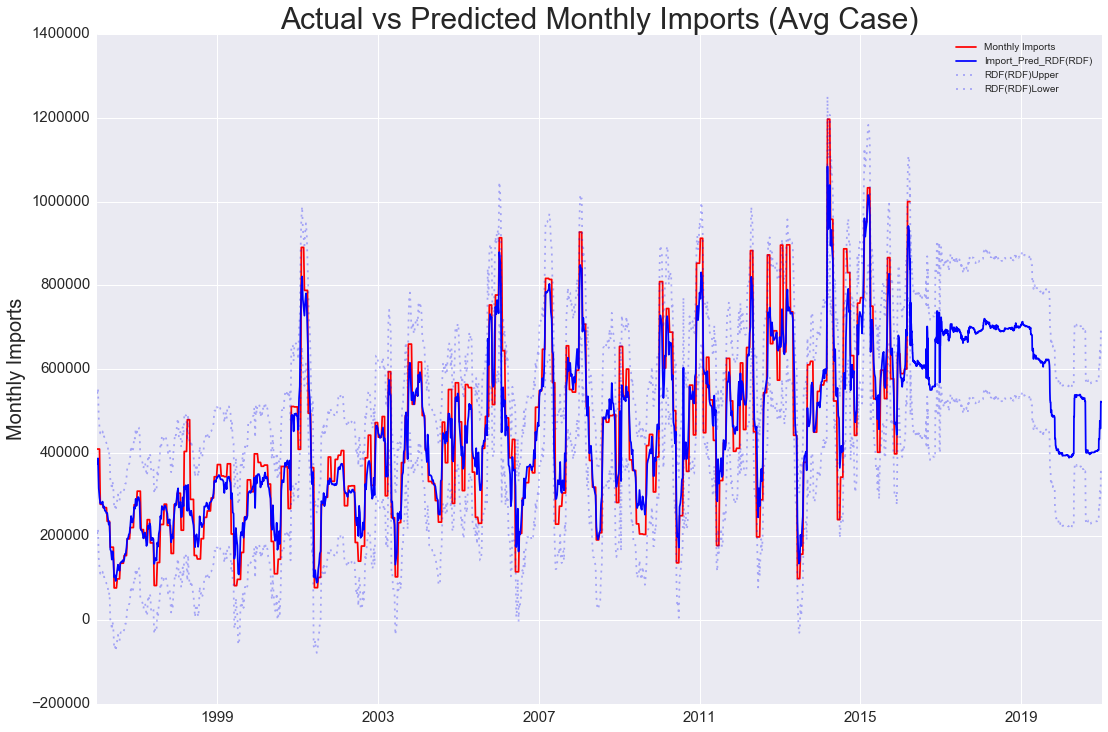

In [131]:
#looking at daily actual vs predicted
x = (combined['Date'])
x_pred = (combined['Date'][1056:])
y1 = (combined['Monthly Imports'])
y4 = (combined['Import_Pred_RDF(MLR)'][1056:])
y5 = (combined['Import_Pred_RDF(RDF)'])
y10 = (combined['RDF(MLR)Upper'][1056:])
y11 = (combined['RDF(MLR)Lower'][1056:])
y12 = (combined['RDF(RDF)Upper'])
y13 = (combined['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x_pred,y4,'g')
ax.plot(x,y5,'b')
#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Imports (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Monthly Imports',size=(20))
plt.show()

# Best Case

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdatebest2.csv")
#should end on Mar 25th 2016
df_96on = data[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports']][0:1056]
df_96on.tail(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
1054,3/18/2016,95.086,41.14,371.75,1.989,52.20,52.20,265,265,1000000
1055,3/25/2016,96.273,40.63,374.50,1.882,51.75,51.75,255,255,1000000


In [133]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
Coal_RDF(MLR)             float64
Coal_RDF(RDF)             float64
Urea_RDF(MLR)             float64
Urea_RDF(RDF)             float64
Monthly Imports           float64
dtype: object

In [134]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,90.653367,54.851648,361.660275,4.611925,58.312026,58.312026,260.121212,260.121212,433007.549242
std,11.734927,31.319022,157.085607,2.364021,33.658418,33.658418,135.997458,135.997458,217395.350089
min,71.657000,11.260000,182.500000,1.661000,20.900000,20.900000,83.000000,83.000000,76875.000000
25%,81.117750,26.402500,231.000000,2.770750,27.425593,27.425593,150.750000,150.750000,273276.000000
50%,87.835000,49.655000,322.750000,4.033500,51.925000,51.925000,240.000000,240.000000,397255.000000
75%,98.747500,82.082500,425.562500,5.879250,80.175000,80.175000,335.000000,335.000000,561875.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,192.500000,825.000000,825.000000,1196863.000000


In [135]:
#first look at coal mlr and urea mlr ones
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 3030339797.399, test: 11354802805.138
R^2 train: 0.938, test: 0.742
[ 0.15469367  0.12862136  0.07724223  0.11877988  0.13634282  0.38432005]


In [136]:
#comparing different models so just one model so far but will then add rdf with coal rdf and urea rdf
import_predicted3 = forest.predict(X)
import_predicted3 = pd.DataFrame(import_predicted3)
df_96on['Import_Pred_RDF(MLR)'] = import_predicted3
rdf_error3 = (abs(df_96on['Import_Pred_RDF(MLR)'] - df_96on['Monthly Imports'])/df_96on['Monthly Imports'])*100
df_96on['RDF_Error(MLR)'] = rdf_error3

import_predicted4 = forest.predict(X)
import_predicted4 = pd.DataFrame(import_predicted4)
df_96on['Import_Pred_RDF(RDF)'] = import_predicted4
rdf_error4 = (abs(df_96on['Import_Pred_RDF(RDF)'] - df_96on['Monthly Imports'])/df_96on['Monthly Imports'])*100
df_96on['RDF_Error(RDF)'] = rdf_error4

#make sure errors are the same considering same rdf
print("Average Monthly Imports RDF(MLR) error is: %.3f" % (rdf_error3.mean()))
print("Average Monthly Imports RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
df_96on

Average Monthly Imports RDF(MLR) error is: 15.653
Average Monthly Imports RDF(RDF) error is: 15.653


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),RDF_Error(MLR),Import_Pred_RDF(RDF),RDF_Error(RDF)
0,1996-01-05,85.060,19.65,369.75,2.424,25.358912,25.358912,220,220,408740,362430.419676,11.329838,362430.419676,11.329838
1,1996-01-12,85.060,17.98,366.25,2.215,25.269689,25.269689,220,220,408740,376865.677949,7.798190,376865.677949,7.798190
2,1996-01-19,86.750,18.25,365.00,1.956,29.070713,29.070713,218,218,408740,317320.139984,22.366262,317320.139984,22.366262
3,1996-01-26,87.640,17.36,360.25,1.952,29.195096,29.195096,215,215,408740,296277.231978,27.514500,296277.231978,27.514500
4,1996-02-02,87.010,17.38,370.50,2.075,32.105527,32.105527,205,205,276750,278062.856172,0.474383,278062.856172,0.474383
5,1996-02-09,86.870,17.38,367.25,2.244,28.667889,28.667889,205,205,276750,282395.131462,2.039795,282395.131462,2.039795
6,1996-02-16,85.910,18.40,382.75,2.171,28.169393,28.169393,210,210,276750,278185.688454,0.518767,278185.688454,0.518767
7,1996-02-23,85.430,18.45,383.50,2.263,28.828182,28.828182,210,210,276750,282489.555948,2.073914,282489.555948,2.073914
8,1996-03-01,86.490,18.62,386.75,2.058,27.863549,27.863549,210,210,268773,273812.371714,1.874955,273812.371714,1.874955
9,1996-03-08,86.810,18.87,388.50,2.053,26.513218,26.513218,205,205,268773,266180.518747,0.964562,266180.518747,0.964562


In [137]:
newpred2 = data [['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)']][1056:]
newpred = data [['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']][1056:]
newpred3 = data[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)','Urea_RDF(RDF)']][1056:]

In [138]:
#new predictions starting with mlr verison
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Import_Pred_RDF(MLR)'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 3007026174.017, test: 11306274035.937
R^2 train: 0.938, test: 0.743
[ 0.15592589  0.11931091  0.08002483  0.11810345  0.14175168  0.38488323]


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Import_Pred_RDF(MLR)
0,2016-03-26,96.273,40.63,374.5,1.882,52.5251,52.5343,252.833,254.253,757790.637585
1,2016-03-27,96.273,40.63,374.5,1.882,52.5251,52.5343,252.833,254.253,757790.637585
2,2016-03-28,95.943,40.53,370.5,1.936,52.5421,53.4882,252.305,247.725,740644.905818
3,2016-03-29,95.16,39.51,373,1.981,52.9604,53.832,236.342,237.536,707823.118050
4,2016-03-30,94.841,39.66,367,2.11,53.1038,53.6404,241.298,240.878,600537.737733
5,2016-03-31,94.586,39.36,351.5,2.054,53.451,55.4772,244.392,251.66,665221.147860
6,2016-04-01,95.5629,42.1429,378.5,2.05512,52.6725,53.6984,251.221,248.902,699397.668337
7,2016-04-02,95.541,42.2857,378.85,2.05624,52.6725,53.6984,251.493,248.987,695297.230974
8,2016-04-03,95.5192,42.4286,379.2,2.05736,52.7715,53.6984,251.328,248.672,695297.230974
9,2016-04-04,95.4974,42.5714,379.55,2.05848,52.9354,53.832,247.902,252.177,680196.265736


In [139]:
#now rdf coal and urea this time
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)','Urea_RDF(RDF)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Import_Pred_RDF(RDF)'] = df_new_pred2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 2904211554.915, test: 11204799720.503
R^2 train: 0.940, test: 0.745
[ 0.1526005   0.12674294  0.08362969  0.12147599  0.12599941  0.38955147]


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
0,2016-03-26,96.273,40.63,374.5,1.882,52.5251,52.5343,252.833,254.253,757790.637585,873640.464286
1,2016-03-27,96.273,40.63,374.5,1.882,52.5251,52.5343,252.833,254.253,757790.637585,873640.464286
2,2016-03-28,95.943,40.53,370.5,1.936,52.5421,53.4882,252.305,247.725,740644.905818,745377.634174
3,2016-03-29,95.16,39.51,373,1.981,52.9604,53.832,236.342,237.536,707823.118050,731665.704105
4,2016-03-30,94.841,39.66,367,2.11,53.1038,53.6404,241.298,240.878,600537.737733,606658.005936
5,2016-03-31,94.586,39.36,351.5,2.054,53.451,55.4772,244.392,251.66,665221.147860,688260.693575
6,2016-04-01,95.5629,42.1429,378.5,2.05512,52.6725,53.6984,251.221,248.902,699397.668337,653607.894352
7,2016-04-02,95.541,42.2857,378.85,2.05624,52.6725,53.6984,251.493,248.987,695297.230974,651144.025780
8,2016-04-03,95.5192,42.4286,379.2,2.05736,52.7715,53.6984,251.328,248.672,695297.230974,651561.511495
9,2016-04-04,95.4974,42.5714,379.55,2.05848,52.9354,53.832,247.902,252.177,680196.265736,665494.519652


In [140]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Coal_RDF(MLR),Coal_RDF(RDF),Corn,Crude,Date,Dollar,Gas,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF),Monthly Imports,RDF_Error(MLR),RDF_Error(RDF),Urea_RDF(MLR),Urea_RDF(RDF)
0,25.3589,25.3589,369.75,19.65,1996-01-05,85.06,2.424,362430.419676,362430.419676,408740,11.329838,11.329838,220,220
1,25.2697,25.2697,366.25,17.98,1996-01-12,85.06,2.215,376865.677949,376865.677949,408740,7.798190,7.798190,220,220
2,29.0707,29.0707,365,18.25,1996-01-19,86.75,1.956,317320.139984,317320.139984,408740,22.366262,22.366262,218,218
3,29.1951,29.1951,360.25,17.36,1996-01-26,87.64,1.952,296277.231978,296277.231978,408740,27.514500,27.514500,215,215
4,32.1055,32.1055,370.5,17.38,1996-02-02,87.01,2.075,278062.856172,278062.856172,276750,0.474383,0.474383,205,205
5,28.6679,28.6679,367.25,17.38,1996-02-09,86.87,2.244,282395.131462,282395.131462,276750,2.039795,2.039795,205,205
6,28.1694,28.1694,382.75,18.4,1996-02-16,85.91,2.171,278185.688454,278185.688454,276750,0.518767,0.518767,210,210
7,28.8282,28.8282,383.5,18.45,1996-02-23,85.43,2.263,282489.555948,282489.555948,276750,2.073914,2.073914,210,210
8,27.8635,27.8635,386.75,18.62,1996-03-01,86.49,2.058,273812.371714,273812.371714,268773,1.874955,1.874955,210,210
9,26.5132,26.5132,388.5,18.87,1996-03-08,86.81,2.053,266180.518747,266180.518747,268773,0.964562,0.964562,205,205


In [141]:
combined.to_csv("C:/Users/msteinme/Documents/monthlyimportsbestmarch2.csv")

In [49]:
#want to go 0,1,2 and no chunk that starts out at 0 again
combined = combined[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
combined.tail(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
2796,2020-12-30 00:00:00,85.0052,71.4959,500,3.99888,51.1133,52.2164,309.7,330.669,NaN,418342,444946
2797,2020-12-31 00:00:00,85,71.5,500,4,51.2358,52.2164,322.752,330.669,NaN,416896,444946


In [50]:
cols = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]

feb_07

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
578,2007-02-02 00:00:00,84.96,59.73,414.75,7.521,52,52,322,322,647111,575696,575696
579,2007-02-09 00:00:00,84.88,60.63,418,7.837,52.65,52.65,325,325,647111,554328,554328
580,2007-02-16 00:00:00,84.06,59.86,429.5,7.533,52.65,52.65,330,330,647111,581338,581338
581,2007-02-23 00:00:00,84.05,62.35,442.5,7.806,52.65,52.65,345,345,647111,658789,658789


In [51]:
apr_16 = combined[cols][1062:1092]
may_16 = combined[cols][1092:1123]
jun_16 = combined[cols][1123:1153]
jul_16 = combined[cols][1153:1184]
aug_16 = combined[cols][1184:1215]
sep_16 = combined[cols][1215:1245]
oct_16 = combined[cols][1245:1276]
nov_16 = combined[cols][1276:1306]
dec_16 = combined[cols][1306:1337]
jan_17 = combined[cols][1337:1368]
feb_17 = combined[cols][1368:1396]
mar_17 = combined[cols][1396:1427]
apr_17 = combined[cols][1427:1457]
may_17 = combined[cols][1457:1488]
jun_17 = combined[cols][1488:1518]
jul_17 = combined[cols][1518:1549]
aug_17 = combined[cols][1549:1580]
sep_17 = combined[cols][1580:1610]
oct_17 = combined[cols][1610:1641]
nov_17 = combined[cols][1641:1671]
dec_17 = combined[cols][1671:1702]
jan_18 = combined[cols][1702:1733]
feb_18 = combined[cols][1733:1761]
mar_18 = combined[cols][1761:1792]
apr_18 = combined[cols][1792:1822]
may_18 = combined[cols][1822:1853]
jun_18 = combined[cols][1853:1883]
jul_18 = combined[cols][1883:1914]
aug_18 = combined[cols][1914:1945]
sep_18 = combined[cols][1945:1975]
oct_18 = combined[cols][1975:2006]
nov_18 = combined[cols][2006:2036]
dec_18 = combined[cols][2036:2067]
jan_19 = combined[cols][2067:2098]
feb_19 = combined[cols][2098:2126]
mar_19 = combined[cols][2126:2157]
apr_19 = combined[cols][2157:2187]
may_19 = combined[cols][2187:2218]
jun_19 = combined[cols][2218:2248]
jul_19 = combined[cols][2248:2279]
aug_19 = combined[cols][2279:2310]
sep_19 = combined[cols][2310:2340]
oct_19 = combined[cols][2340:2371]
nov_19 = combined[cols][2371:2401]
dec_19 = combined[cols][2401:2432]
jan_20 = combined[cols][2432:2463]
feb_20 = combined[cols][2463:2492]
mar_20 = combined[cols][2492:2523]
apr_20 = combined[cols][2523:2553]
may_20 = combined[cols][2553:2584]
jun_20 = combined[cols][2584:2614]
jul_20 = combined[cols][2614:2645]
aug_20 = combined[cols][2645:2676]
sep_20 = combined[cols][2676:2706]
oct_20 = combined[cols][2706:2737]
nov_20 = combined[cols][2737:2767]
dec_20 = combined[cols][2767:2798]
oct_18

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
1975,2018-10-01 00:00:00,87.475,70.5,465,3.07856,61.9467,61.776,303.445,310.04,NaN,455329,476470
1976,2018-10-02 00:00:00,87.4951,70.5385,465.11,3.07969,61.7323,61.7002,305.158,310.501,NaN,460049,476470
1977,2018-10-03 00:00:00,87.5151,70.5769,465.22,3.08081,61.7323,61.7002,305.158,310.501,NaN,460049,476470
1978,2018-10-04 00:00:00,87.5352,70.6154,465.33,3.08193,61.7323,61.7002,305.158,310.501,NaN,460049,477370
1979,2018-10-05 00:00:00,87.5552,70.6538,465.44,3.08305,61.7323,61.7002,304.773,310.501,NaN,460049,476239
1980,2018-10-06 00:00:00,87.5753,70.6923,465.549,3.08417,61.7323,61.7002,304.773,310.501,NaN,460049,476239
1981,2018-10-07 00:00:00,87.5953,70.7308,465.659,3.08529,61.5169,60.8666,307.266,328.982,NaN,462837,508508
1982,2018-10-08 00:00:00,87.6154,70.7692,465.769,3.08641,61.4027,60.8666,307.913,328.982,NaN,462567,508508
1983,2018-10-09 00:00:00,87.6354,70.8077,465.879,3.08753,61.2814,60.9721,323.525,326.753,NaN,477915,509964
1984,2018-10-10 00:00:00,87.6555,70.8462,465.989,3.08865,61.2814,61.0571,323.525,326.502,NaN,479188,509964


In [52]:
mycolumns = ['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()    

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
295,85.713151,70.936986,500,3.846427,69.617710,65.696614,316.547852,324.194125,NaN,326842.188567,339824.157493
296,85.554384,71.062329,500,3.880617,60.773187,60.916749,334.766728,325.245768,NaN,497690.611072,380612.065905
297,85.395616,71.187671,500,3.914806,54.163148,52.474836,352.997210,332.092113,NaN,616423.770901,426973.530894
298,85.236849,71.313014,500,3.948996,52.839649,52.044962,332.810053,329.015508,NaN,437436.330073,445307.967910
299,85.078082,71.438356,500,3.983185,51.875063,52.157542,323.547083,330.074078,NaN,421977.929999,445540.844452


In [53]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [54]:
df
print(df.dtypes)

Dollar                         float64
Crude                          float64
Corn                           float64
Gas                            float64
Coal_RDF(MLR)                  float64
Coal_RDF(RDF)                  float64
Urea_RDF(MLR)                  float64
Urea_RDF(RDF)                  float64
Monthly Imports                float64
Import_Pred_RDF(MLR)           float64
Import_Pred_RDF(RDF)           float64
Monthly_Date            datetime64[ns]
dtype: object


In [55]:
#std dev of each of the different models
RDFMLR_upper = df['Import_Pred_RDF(MLR)'] + combined['Import_Pred_RDF(MLR)'].std()
df['RDF(MLR)Upper'] = RDFMLR_upper
RDFMLR_lower = df['Import_Pred_RDF(MLR)'] - combined['Import_Pred_RDF(MLR)'].std()
df['RDF(MLR)Lower'] = RDFMLR_lower

RDFRDF_upper = df['Import_Pred_RDF(RDF)'] + combined['Import_Pred_RDF(RDF)'].std()
df['RDF(RDF)Upper'] = RDFRDF_upper
RDFRDF_lower = df['Import_Pred_RDF(RDF)'] - combined['Import_Pred_RDF(RDF)'].std()
df['RDF(RDF)Lower'] = RDFRDF_lower

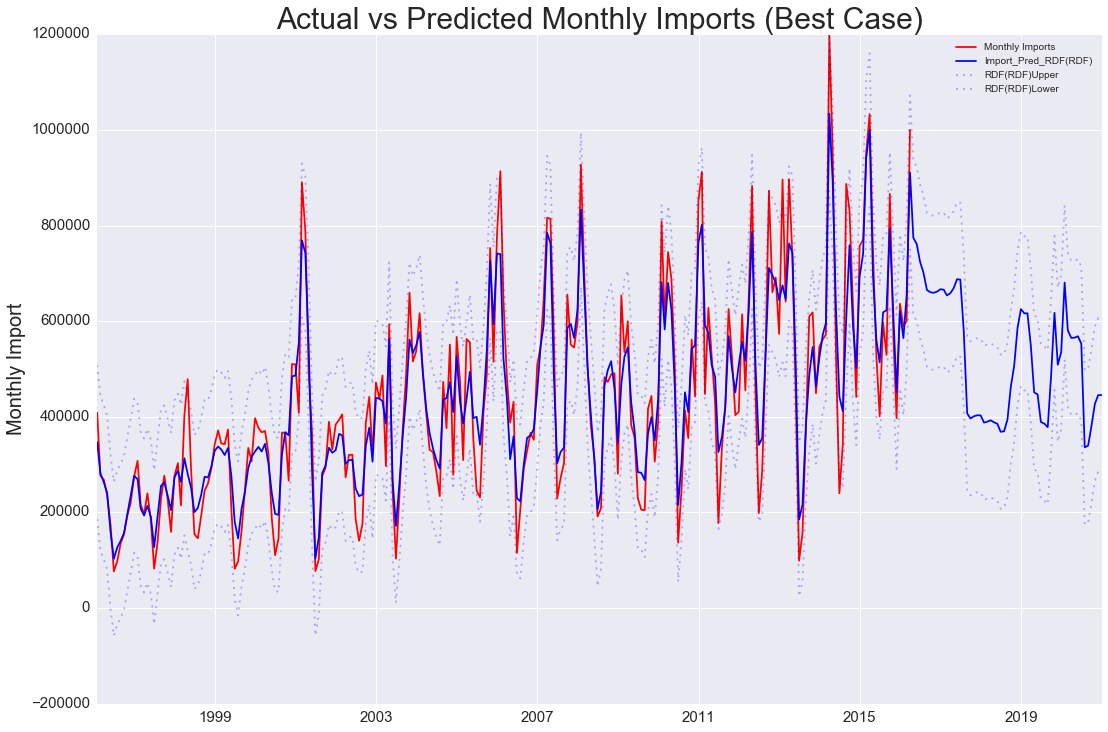

In [63]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'][243:])
y1 = (df['Monthly Imports'])
y4 = (df['Import_Pred_RDF(MLR)'][243:])
y5 = (df['Import_Pred_RDF(RDF)'])
y10 = (df['RDF(MLR)Upper'][243:])
y11 = (df['RDF(MLR)Lower'][243:])
y12 = (df['RDF(RDF)Upper'])
y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x_pred,y4,'g')
ax.plot(x,y5,'b')

#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Imports (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Monthly Import',size=(20))

plt.show()

In [64]:
#now daily so not as smooth, but first find new std dev of all predicted models
#std dev of each of the different models
RDFMLR_upper2 = combined['Import_Pred_RDF(MLR)'] + combined['Import_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Upper'] = RDFMLR_upper2
RDFMLR_lower2 = combined['Import_Pred_RDF(MLR)'] - combined['Import_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Lower'] = RDFMLR_lower2

RDFRDF_upper2 = combined['Import_Pred_RDF(RDF)'] + combined['Import_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Upper'] = RDFRDF_upper2
RDFRDF_lower2 = combined['Import_Pred_RDF(RDF)'] - combined['Import_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Lower'] = RDFRDF_lower2

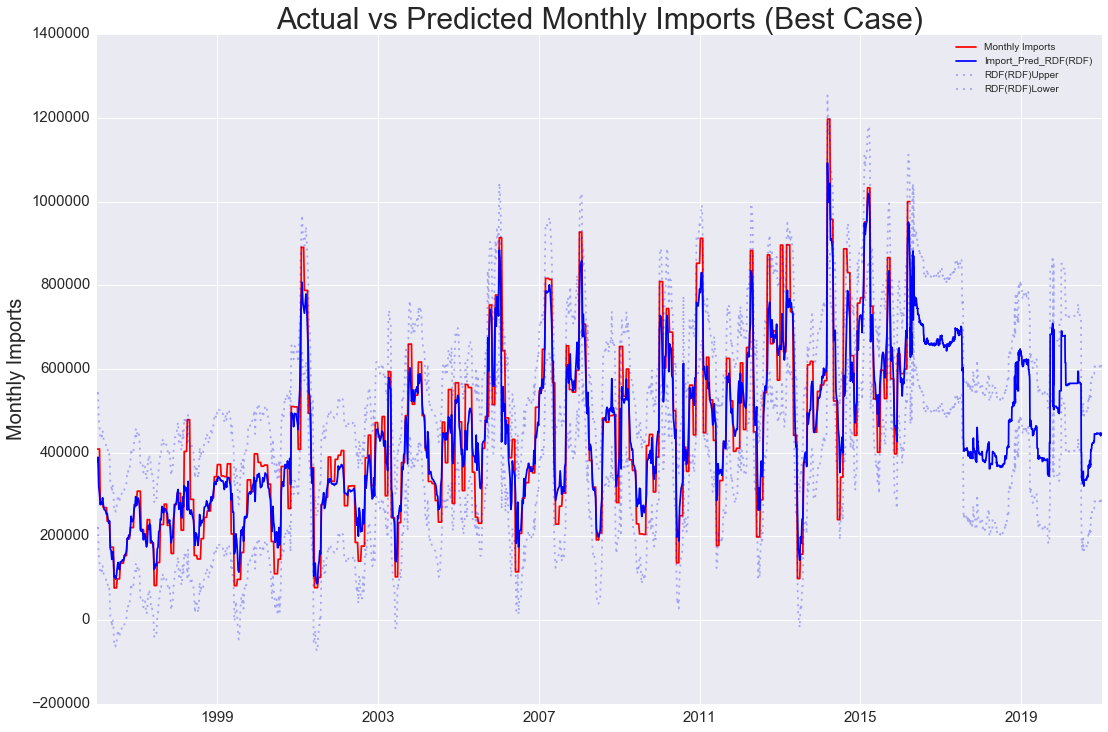

In [69]:
#looking at daily actual vs predicted
x = (combined['Date'])
x_pred = (combined['Date'][1056:])
y1 = (combined['Monthly Imports'])
y4 = (combined['Import_Pred_RDF(MLR)'][1056:])
y5 = (combined['Import_Pred_RDF(RDF)'])
y10 = (combined['RDF(MLR)Upper'][1056:])
y11 = (combined['RDF(MLR)Lower'][1056:])
y12 = (combined['RDF(RDF)Upper'])
y13 = (combined['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x_pred,y4,'g')
ax.plot(x,y5,'b')
#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Imports (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Monthly Imports',size=(20))
plt.show()

# Worst Case

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdateworst2.csv")
#should end on Mar 25th 2016
df_96on = data[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports']][0:1056]
df_96on.tail(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
1054,3/18/2016,95.086,41.14,371.75,1.989,52.20,52.20,265,265,1000000
1055,3/25/2016,96.273,40.63,374.50,1.882,51.75,51.75,255,255,1000000


In [71]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
Coal_RDF(MLR)             float64
Coal_RDF(RDF)             float64
Urea_RDF(MLR)             float64
Urea_RDF(RDF)             float64
Monthly Imports           float64
dtype: object

In [72]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,90.653367,54.851648,361.660275,4.611925,58.312026,58.312026,260.121212,260.121212,433007.549242
std,11.734927,31.319022,157.085607,2.364021,33.658418,33.658418,135.997458,135.997458,217395.350089
min,71.657000,11.260000,182.500000,1.661000,20.900000,20.900000,83.000000,83.000000,76875.000000
25%,81.117750,26.402500,231.000000,2.770750,27.425593,27.425593,150.750000,150.750000,273276.000000
50%,87.835000,49.655000,322.750000,4.033500,51.925000,51.925000,240.000000,240.000000,397255.000000
75%,98.747500,82.082500,425.562500,5.879250,80.175000,80.175000,335.000000,335.000000,561875.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,192.500000,825.000000,825.000000,1196863.000000


In [73]:
#first look at coal mlr and urea mlr ones
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 2996159122.047, test: 11274988104.298
R^2 train: 0.938, test: 0.744
[ 0.1609357   0.11307388  0.07914219  0.12226214  0.12635821  0.39822789]


In [74]:
#comparing different models so just one model so far but will then add rdf with coal rdf and urea rdf
import_predicted3 = forest.predict(X)
import_predicted3 = pd.DataFrame(import_predicted3)
df_96on['Import_Pred_RDF(MLR)'] = import_predicted3
rdf_error3 = (abs(df_96on['Import_Pred_RDF(MLR)'] - df_96on['Monthly Imports'])/df_96on['Monthly Imports'])*100
df_96on['RDF_Error(MLR)'] = rdf_error3

import_predicted4 = forest.predict(X)
import_predicted4 = pd.DataFrame(import_predicted4)
df_96on['Import_Pred_RDF(RDF)'] = import_predicted4
rdf_error4 = (abs(df_96on['Import_Pred_RDF(RDF)'] - df_96on['Monthly Imports'])/df_96on['Monthly Imports'])*100
df_96on['RDF_Error(RDF)'] = rdf_error4

#make sure errors are the same considering same rdf
print("Average Monthly Imports RDF(MLR) error is: %.3f" % (rdf_error3.mean()))
print("Average Monthly Imports RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
df_96on

Average Monthly Imports RDF(MLR) error is: 15.533
Average Monthly Imports RDF(RDF) error is: 15.533


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),RDF_Error(MLR),Import_Pred_RDF(RDF),RDF_Error(RDF)
0,1996-01-05,85.060,19.65,369.75,2.424,25.358912,25.358912,220,220,408740,380756.996060,6.846162,380756.996060,6.846162
1,1996-01-12,85.060,17.98,366.25,2.215,25.269689,25.269689,220,220,408740,382668.774076,6.378438,382668.774076,6.378438
2,1996-01-19,86.750,18.25,365.00,1.956,29.070713,29.070713,218,218,408740,325828.587390,20.284634,325828.587390,20.284634
3,1996-01-26,87.640,17.36,360.25,1.952,29.195096,29.195096,215,215,408740,300051.848801,26.591024,300051.848801,26.591024
4,1996-02-02,87.010,17.38,370.50,2.075,32.105527,32.105527,205,205,276750,279819.723231,1.109204,279819.723231,1.109204
5,1996-02-09,86.870,17.38,367.25,2.244,28.667889,28.667889,205,205,276750,282717.717767,2.156357,282717.717767,2.156357
6,1996-02-16,85.910,18.40,382.75,2.171,28.169393,28.169393,210,210,276750,278487.779710,0.627924,278487.779710,0.627924
7,1996-02-23,85.430,18.45,383.50,2.263,28.828182,28.828182,210,210,276750,287200.633175,3.776200,287200.633175,3.776200
8,1996-03-01,86.490,18.62,386.75,2.058,27.863549,27.863549,210,210,268773,275866.070516,2.639056,275866.070516,2.639056
9,1996-03-08,86.810,18.87,388.50,2.053,26.513218,26.513218,205,205,268773,264410.550816,1.623098,264410.550816,1.623098


In [75]:
newpred2 = data [['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)']][1056:]
newpred = data [['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']][1056:]
newpred3 = data[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)','Urea_RDF(RDF)']][1056:]

In [76]:
#new predictions starting with mlr verison
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Urea_RDF(MLR)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Import_Pred_RDF(MLR)'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 3025496190.846, test: 11012762701.750
R^2 train: 0.938, test: 0.750
[ 0.16033714  0.1108358   0.08277751  0.12101351  0.13723506  0.38780099]


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Import_Pred_RDF(MLR)
0,2016-03-26,96.273,40.63,374.5,1.882,52.2853,52.5426,254.18,253.056,835343.442537
1,2016-03-27,96.273,40.63,374.5,1.882,52.2853,52.5426,254.18,253.056,835343.442537
2,2016-03-28,95.943,40.53,370.5,1.936,52.2865,53.7917,254.162,250.784,820238.476982
3,2016-03-29,95.16,39.51,373,1.981,52.9085,54.9921,238.421,242.358,727376.754870
4,2016-03-30,94.841,39.66,367,2.11,53.0801,55.0984,242.647,246.683,634047.215857
5,2016-03-31,94.586,39.36,351.5,2.054,53.2868,58.1383,247.476,252.399,659071.788668
6,2016-04-01,97.2057,38.3,368.857,2.05397,52.0718,52.3235,242.916,242.872,624431.048357
7,2016-04-02,97.2934,38.2,368.564,2.05394,52.0718,52.2945,242.916,242.872,622145.334071
8,2016-04-03,97.3811,38.1,368.271,2.05391,51.8318,52.2922,243.659,242.854,620139.825319
9,2016-04-04,97.4689,37.9,367.979,2.05388,51.7373,52.3905,245.384,245.086,624952.259604


In [77]:
#now rdf coal and urea this time
X = df_96on[['Dollar','Crude','Corn','Gas','Coal_RDF(RDF)','Urea_RDF(RDF)']].values
y = df_96on['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Import_Pred_RDF(RDF)'] = df_new_pred2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 2985686300.970, test: 11216693483.063
R^2 train: 0.939, test: 0.745
[ 0.15530814  0.1194713   0.0821736   0.12442107  0.12844194  0.39018395]


,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
0,2016-03-26,96.273,40.63,374.5,1.882,52.2853,52.5426,254.18,253.056,835343.442537,770158.844862
1,2016-03-27,96.273,40.63,374.5,1.882,52.2853,52.5426,254.18,253.056,835343.442537,770158.844862
2,2016-03-28,95.943,40.53,370.5,1.936,52.2865,53.7917,254.162,250.784,820238.476982,735657.077277
3,2016-03-29,95.16,39.51,373,1.981,52.9085,54.9921,238.421,242.358,727376.754870,720512.071533
4,2016-03-30,94.841,39.66,367,2.11,53.0801,55.0984,242.647,246.683,634047.215857,629145.644057
5,2016-03-31,94.586,39.36,351.5,2.054,53.2868,58.1383,247.476,252.399,659071.788668,670745.660141
6,2016-04-01,97.2057,38.3,368.857,2.05397,52.0718,52.3235,242.916,242.872,624431.048357,629999.385579
7,2016-04-02,97.2934,38.2,368.564,2.05394,52.0718,52.2945,242.916,242.872,622145.334071,630214.841164
8,2016-04-03,97.3811,38.1,368.271,2.05391,51.8318,52.2922,243.659,242.854,620139.825319,623750.422878
9,2016-04-04,97.4689,37.9,367.979,2.05388,51.7373,52.3905,245.384,245.086,624952.259604,627495.488832


In [78]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Coal_RDF(MLR),Coal_RDF(RDF),Corn,Crude,Date,Dollar,Gas,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF),Monthly Imports,RDF_Error(MLR),RDF_Error(RDF),Urea_RDF(MLR),Urea_RDF(RDF)
0,25.3589,25.3589,369.75,19.65,1996-01-05,85.06,2.424,380756.996060,380756.996060,408740,6.846162,6.846162,220,220
1,25.2697,25.2697,366.25,17.98,1996-01-12,85.06,2.215,382668.774076,382668.774076,408740,6.378438,6.378438,220,220
2,29.0707,29.0707,365,18.25,1996-01-19,86.75,1.956,325828.587390,325828.587390,408740,20.284634,20.284634,218,218
3,29.1951,29.1951,360.25,17.36,1996-01-26,87.64,1.952,300051.848801,300051.848801,408740,26.591024,26.591024,215,215
4,32.1055,32.1055,370.5,17.38,1996-02-02,87.01,2.075,279819.723231,279819.723231,276750,1.109204,1.109204,205,205
5,28.6679,28.6679,367.25,17.38,1996-02-09,86.87,2.244,282717.717767,282717.717767,276750,2.156357,2.156357,205,205
6,28.1694,28.1694,382.75,18.4,1996-02-16,85.91,2.171,278487.779710,278487.779710,276750,0.627924,0.627924,210,210
7,28.8282,28.8282,383.5,18.45,1996-02-23,85.43,2.263,287200.633175,287200.633175,276750,3.776200,3.776200,210,210
8,27.8635,27.8635,386.75,18.62,1996-03-01,86.49,2.058,275866.070516,275866.070516,268773,2.639056,2.639056,210,210
9,26.5132,26.5132,388.5,18.87,1996-03-08,86.81,2.053,264410.550816,264410.550816,268773,1.623098,1.623098,205,205


In [80]:
combined.to_csv("C:/Users/msteinme/Documents/monthlyimportsworstmarch2.csv")

In [81]:
#want to go 0,1,2 and no chunk that starts out at 0 again
combined = combined[['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
combined.tail(2)

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
2796,2020-12-30 00:00:00,90.0088,48,418.918,2.00003,54.1668,58.3254,307.843,301.934,NaN,718819,717104
2797,2020-12-31 00:00:00,90,48,419,2,54.1668,58.3254,307.843,301.934,NaN,718819,717104


In [82]:
cols = ['Date','Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]

feb_07

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
578,2007-02-02 00:00:00,84.96,59.73,414.75,7.521,52,52,322,322,647111,585943,585943
579,2007-02-09 00:00:00,84.88,60.63,418,7.837,52.65,52.65,325,325,647111,562754,562754
580,2007-02-16 00:00:00,84.06,59.86,429.5,7.533,52.65,52.65,330,330,647111,588761,588761
581,2007-02-23 00:00:00,84.05,62.35,442.5,7.806,52.65,52.65,345,345,647111,668618,668618


In [83]:
apr_16 = combined[cols][1062:1092]
may_16 = combined[cols][1092:1123]
jun_16 = combined[cols][1123:1153]
jul_16 = combined[cols][1153:1184]
aug_16 = combined[cols][1184:1215]
sep_16 = combined[cols][1215:1245]
oct_16 = combined[cols][1245:1276]
nov_16 = combined[cols][1276:1306]
dec_16 = combined[cols][1306:1337]
jan_17 = combined[cols][1337:1368]
feb_17 = combined[cols][1368:1396]
mar_17 = combined[cols][1396:1427]
apr_17 = combined[cols][1427:1457]
may_17 = combined[cols][1457:1488]
jun_17 = combined[cols][1488:1518]
jul_17 = combined[cols][1518:1549]
aug_17 = combined[cols][1549:1580]
sep_17 = combined[cols][1580:1610]
oct_17 = combined[cols][1610:1641]
nov_17 = combined[cols][1641:1671]
dec_17 = combined[cols][1671:1702]
jan_18 = combined[cols][1702:1733]
feb_18 = combined[cols][1733:1761]
mar_18 = combined[cols][1761:1792]
apr_18 = combined[cols][1792:1822]
may_18 = combined[cols][1822:1853]
jun_18 = combined[cols][1853:1883]
jul_18 = combined[cols][1883:1914]
aug_18 = combined[cols][1914:1945]
sep_18 = combined[cols][1945:1975]
oct_18 = combined[cols][1975:2006]
nov_18 = combined[cols][2006:2036]
dec_18 = combined[cols][2036:2067]
jan_19 = combined[cols][2067:2098]
feb_19 = combined[cols][2098:2126]
mar_19 = combined[cols][2126:2157]
apr_19 = combined[cols][2157:2187]
may_19 = combined[cols][2187:2218]
jun_19 = combined[cols][2218:2248]
jul_19 = combined[cols][2248:2279]
aug_19 = combined[cols][2279:2310]
sep_19 = combined[cols][2310:2340]
oct_19 = combined[cols][2340:2371]
nov_19 = combined[cols][2371:2401]
dec_19 = combined[cols][2401:2432]
jan_20 = combined[cols][2432:2463]
feb_20 = combined[cols][2463:2492]
mar_20 = combined[cols][2492:2523]
apr_20 = combined[cols][2523:2553]
may_20 = combined[cols][2553:2584]
jun_20 = combined[cols][2584:2614]
jul_20 = combined[cols][2614:2645]
aug_20 = combined[cols][2645:2676]
sep_20 = combined[cols][2676:2706]
oct_20 = combined[cols][2706:2737]
nov_20 = combined[cols][2737:2767]
dec_20 = combined[cols][2767:2798]
oct_18

,Date,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
1975,2018-10-01 00:00:00,100.75,42,373.75,2.02557,55.8219,53.6918,276.146,249.379,NaN,751919,572664
1976,2018-10-02 00:00:00,100.709,42,373.797,2.02554,55.8219,53.6918,276.146,249.379,NaN,751919,572664
1977,2018-10-03 00:00:00,100.668,42,373.843,2.02551,55.8219,53.6918,276.146,249.379,NaN,751919,572664
1978,2018-10-04 00:00:00,100.626,42.1,373.89,2.02548,55.8219,53.6902,276.146,249.379,NaN,751919,572664
1979,2018-10-05 00:00:00,100.585,42.1,373.937,2.02544,55.8219,53.6902,276.146,249.379,NaN,751919,572664
1980,2018-10-06 00:00:00,100.544,42.1,373.984,2.02541,55.8219,53.6902,276.146,249.379,NaN,751919,572664
1981,2018-10-07 00:00:00,100.503,42.1,374.03,2.02538,55.8219,53.6902,275.796,249.039,NaN,780834,572664
1982,2018-10-08 00:00:00,100.462,42.2,374.077,2.02535,55.8145,53.6625,274.338,248.414,NaN,797339,564093
1983,2018-10-09 00:00:00,100.42,42.2,374.124,2.02532,55.8145,54.6789,274.338,261.354,NaN,797339,723127
1984,2018-10-10 00:00:00,100.379,42.2,374.17,2.02529,55.8145,54.6789,274.338,261.354,NaN,797339,723127


In [84]:
mycolumns = ['Dollar','Crude','Corn','Gas','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea_RDF(MLR)','Urea_RDF(RDF)','Monthly Imports','Import_Pred_RDF(MLR)','Import_Pred_RDF(RDF)']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()    

,Dollar,Crude,Corn,Gas,Coal_RDF(MLR),Coal_RDF(RDF),Urea_RDF(MLR),Urea_RDF(RDF),Monthly Imports,Import_Pred_RDF(MLR),Import_Pred_RDF(RDF)
295,91.201096,45.000000,407.739726,2.004262,52.947593,57.920552,267.691569,262.730825,NaN,827755.802219,788435.871680
296,90.933699,45.666667,410.246575,2.003313,53.566113,58.068531,269.182344,264.006039,NaN,806014.092690,790998.762163
297,90.666301,46.332258,412.753425,2.002364,53.625795,58.068531,290.516945,287.717395,NaN,765291.886717,795416.666719
298,90.398904,47.003333,415.260274,2.001415,53.884070,58.041631,297.394826,295.286396,NaN,758926.703687,783145.838783
299,90.131507,47.670968,417.767123,2.000467,53.999231,58.247921,302.396664,300.027576,NaN,731792.876983,727685.638626


In [85]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [86]:
df
print(df.dtypes)

Dollar                         float64
Crude                          float64
Corn                           float64
Gas                            float64
Coal_RDF(MLR)                  float64
Coal_RDF(RDF)                  float64
Urea_RDF(MLR)                  float64
Urea_RDF(RDF)                  float64
Monthly Imports                float64
Import_Pred_RDF(MLR)           float64
Import_Pred_RDF(RDF)           float64
Monthly_Date            datetime64[ns]
dtype: object


In [87]:
#std dev of each of the different models
RDFMLR_upper = df['Import_Pred_RDF(MLR)'] + combined['Import_Pred_RDF(MLR)'].std()
df['RDF(MLR)Upper'] = RDFMLR_upper
RDFMLR_lower = df['Import_Pred_RDF(MLR)'] - combined['Import_Pred_RDF(MLR)'].std()
df['RDF(MLR)Lower'] = RDFMLR_lower

RDFRDF_upper = df['Import_Pred_RDF(RDF)'] + combined['Import_Pred_RDF(RDF)'].std()
df['RDF(RDF)Upper'] = RDFRDF_upper
RDFRDF_lower = df['Import_Pred_RDF(RDF)'] - combined['Import_Pred_RDF(RDF)'].std()
df['RDF(RDF)Lower'] = RDFRDF_lower

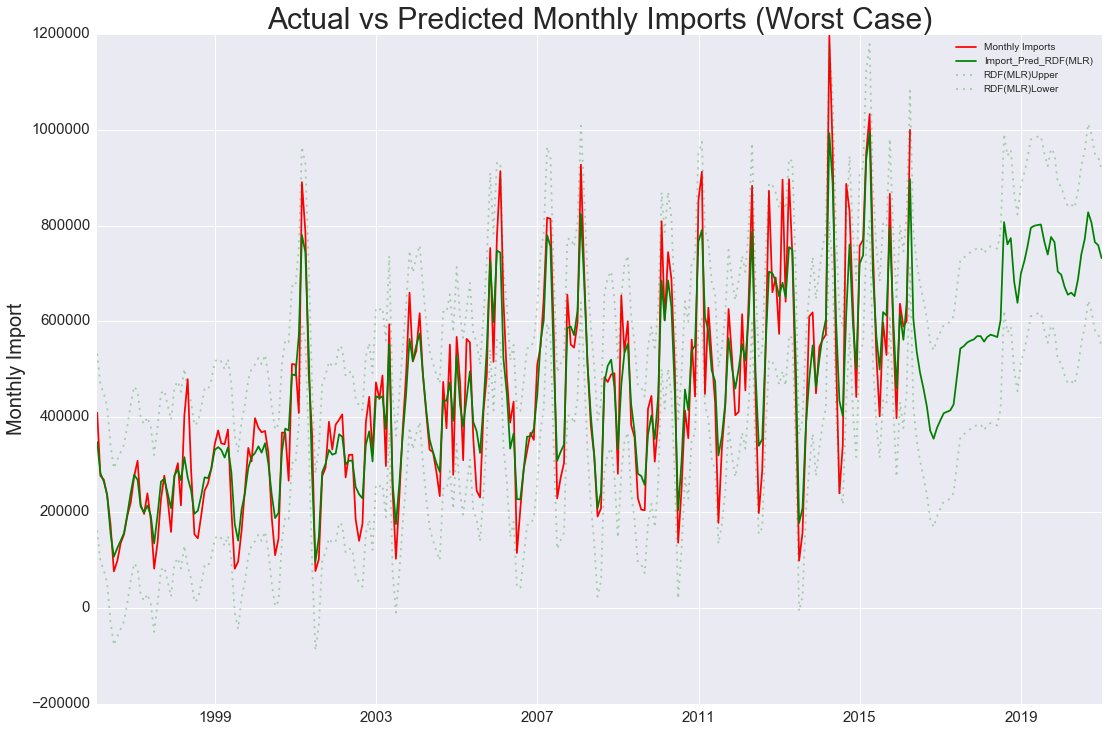

In [94]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'][243:])
y1 = (df['Monthly Imports'])
y4 = (df['Import_Pred_RDF(MLR)'])
y5 = (df['Import_Pred_RDF(RDF)'])
y10 = (df['RDF(MLR)Upper'])
y11 = (df['RDF(MLR)Lower'])
y12 = (df['RDF(RDF)Upper'])
y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y4,'g')
#ax.plot(x,y5,'b')

ax.plot(x,y10,'g--',dashes=(2,5),alpha=0.3)
ax.plot(x,y11,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Imports (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Monthly Import',size=(20))

plt.show()

In [95]:
#now daily so not as smooth, but first find new std dev of all predicted models
#std dev of each of the different models
RDFMLR_upper2 = combined['Import_Pred_RDF(MLR)'] + combined['Import_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Upper'] = RDFMLR_upper2
RDFMLR_lower2 = combined['Import_Pred_RDF(MLR)'] - combined['Import_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Lower'] = RDFMLR_lower2

RDFRDF_upper2 = combined['Import_Pred_RDF(RDF)'] + combined['Import_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Upper'] = RDFRDF_upper2
RDFRDF_lower2 = combined['Import_Pred_RDF(RDF)'] - combined['Import_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Lower'] = RDFRDF_lower2

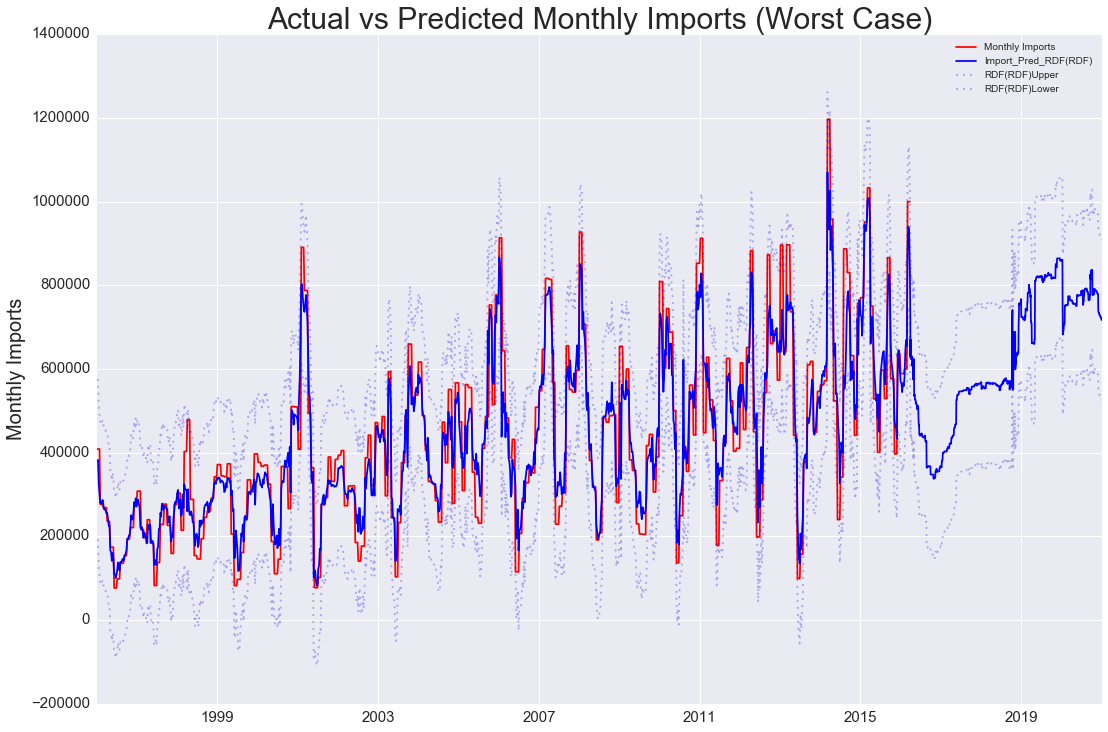

In [100]:
#looking at daily actual vs predicted
x = (combined['Date'])
x_pred = (combined['Date'][1056:])
y1 = (combined['Monthly Imports'])
y4 = (combined['Import_Pred_RDF(MLR)'][1056:])
y5 = (combined['Import_Pred_RDF(RDF)'])
y10 = (combined['RDF(MLR)Upper'][1056:])
y11 = (combined['RDF(MLR)Lower'][1056:])
y12 = (combined['RDF(RDF)Upper'])
y13 = (combined['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x_pred,y4,'g')
ax.plot(x,y5,'b')
#ax.plot(x_pred,y10,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'g--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'b--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'b--',dashes=(2,5),alpha=0.3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Imports (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Monthly Imports',size=(20))
plt.show()